In [131]:
# ------------------- 导入库 -------------------
# 导入 torch（张量运算）、random（打乱顺序）、d2l（可视化工具）

import torch
import random
from d2l import torch as d2l

In [132]:
# ------------------- 数据生成函数 -------------------
# 定义一个函数，用来生成线性模型数据: y = Xw + b + 噪声
# 输入: 权重 w, 偏置 b, 样本数量
# 输出: 特征矩阵 X, 标签向量 y

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = X @ w + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y


In [133]:

# ------------------- 生成模拟数据 -------------------
# 设置真实的参数 (w, b)
# 调用数据生成函数得到特征和标签
# 检查数据的维度是否正确

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, label = synthetic_data(true_w, true_b, 1000)

# w = torch.tensor([2., 3.])
# b = torch.tensor(3.)
# features, label = synthetic_data(w, b, 1000)
features.shape, label.shape, features.grad

(torch.Size([1000, 2]), torch.Size([1000]), None)

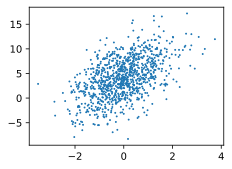

In [134]:
# ------------------- 数据可视化 -------------------
# 使用 d2l 的工具画散点图
# 观察特征与标签之间的线性关系
d2l.set_figsize()
d2l.plt.scatter(features[ : , 0 ], label, 1)

In [135]:
# ------------------- 数据迭代器 -------------------
# 定义一个函数 data_iter:
# 1. 随机打乱索引
# 2. 按批量大小分批返回 (X, y)
# 测试迭代器: 打印出一批数据
def data_iter(batch_size, features, label):
    n = len(features)
    indices = list(range(n))
    random.shuffle(indices)
    for i in range(0, n, batch_size):
        batch_idx = indices[i:min(i+batch_size, n)]
        yield features[batch_idx], label[batch_idx]

for X, y in data_iter(10, features, label):
    print(X, "\n", y)
    break

tensor([[ 2.9133,  1.1899],
        [-0.8093,  0.3613],
        [ 0.3533,  0.1491],
        [-0.1603, -1.0224],
        [-0.3195,  0.0911],
        [ 0.1840,  0.6485],
        [-0.4694,  1.4912],
        [ 0.2641, -0.8804],
        [-0.1196, -0.4279],
        [ 0.3568,  0.8051]]) 
 tensor([ 5.9861,  1.3463,  4.4193,  7.3675,  3.2553,  2.3689, -1.8117,  7.7078,
         5.4198,  2.1752])


In [136]:
# ------------------- 模型参数初始化 -------------------
# 定义参数 w, b
# w 用正态分布随机初始化
# b 初始化为 0
# 两个参数都需要计算梯度
w = torch.normal(0, 1, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b


(tensor([[0.8592],
         [0.9925]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [137]:
# ------------------- 模型定义 -------------------
# 定义线性回归函数: y_hat = Xw + b
def model_linear(X, w, b):
    return X @ w + b

In [138]:
# ------------------- 损失函数定义 -------------------
# 定义平方损失函数: (y_hat - y)^2
# 注意要保证 y 的形状与预测值一致
def loss_function(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2

In [139]:
# ------------------- 优化器 (SGD) -------------------
# 定义随机梯度下降函数:
# - 在 no_grad 下更新参数
# - 用学习率和 batch_size 调整更新幅度
# - 更新后将梯度清零
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [140]:
# ------------------- 训练循环 -------------------
# 设置超参数: 学习率, 训练轮数, 批量大小
# 训练过程:
#   外层循环: 遍历 epoch
#   内层循环: 遍历小批量数据
#       - 前向计算预测值
#       - 计算损失并反向传播
#       - 调用 SGD 更新参数
#   每个 epoch 结束后: 在整个数据集上计算平均损失并打印
batch_size = 10
epochs = 10
lr = 0.01

for epoch in range(epochs):
    for X, y in data_iter(batch_size, features, label):
        y_hat = model_linear(X, w, b)
        loss = loss_function(y_hat, y)
        loss.sum().backward()
        sgd([w, b], lr, batch_size)


    with torch.no_grad():
        train_loss = loss_function(model_linear(features, w, b), label)
        print("epoch:", epoch, "loss:", train_loss.mean())


epoch: 0 loss: tensor(649.5936)
epoch: 1 loss: tensor(11.4040)
epoch: 2 loss: tensor(0.3008)
epoch: 3 loss: tensor(0.1062)
epoch: 4 loss: tensor(0.1022)
epoch: 5 loss: tensor(0.1020)
epoch: 6 loss: tensor(0.1020)
epoch: 7 loss: tensor(0.1021)
epoch: 8 loss: tensor(0.1021)
epoch: 9 loss: tensor(0.1020)
